In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import modelling

# 3D plot in parameter space
# Plot for known drugs
param_lib = modelling.BindingParameters()
drug_list = param_lib.drug_compounds

SA_model = modelling.SensitivityAnalysis()
param_names = SA_model.param_names

starting_param_df = pd.DataFrame([1] * 5, index=param_names).T
ComparisonController = modelling.ModelComparison(starting_param_df)

In [ ]:
# Read data for drugs
saved_data_dir = '../../../simulation_data/'
filename = 'SA_alldrugs.csv'
df = pd.read_csv(saved_data_dir + filename,
                 header=[0, 1], index_col=[0],
                 skipinitialspace=True)

Vhalf_list = df['param_values']['Vhalf'].values
Kmax_list = df['param_values']['Kmax'].values
Ku_list = df['param_values']['Ku'].values
drug_list = df['drug']['drug'].values

RMSError_drug = df['RMSE']['RMSE'].values
MAError_drug = df['MAE']['MAE'].values

In [24]:
# Read data for space
saved_data_dir = '../../../simulation_data/sensitivity_analysis/'
file_prefix = 'SA_allparam_'
result_files = [saved_data_dir + f for f in os.listdir(saved_data_dir) if f.startswith(file_prefix)]

saved_data_dir = '../../../simulation_results/'
file_prefix = 'SA_allparam_gaps_'
result_files2 = [saved_data_dir + f for f in os.listdir(saved_data_dir) if f.startswith(file_prefix)]

result_files.extend(result_files2)

# Vhalf_range = np.array([])
# Kmax_range = np.array([])
# Ku_range = np.array([])

# RMSError = np.array([])
# MAError = np.array([])

# param_id = np.array([])

first_iter = True
for file in result_files:
    df = pd.read_csv(file,
                     header=[0, 1], index_col=[0],
                     skipinitialspace=True)
    df = df.loc[df['RMSE']['RMSE'] < RMSE_range]
    
    if first_iter:
        combined_df = df
        first_iter = False
    else:
        combined_df = pd.concat([combined_df, df])
        

combined_df = combined_df.sort_values(by=[('param_values', 'Ku'), ('param_values', 'Kmax'), ('param_values', 'Vhalf')])

Vhalf_range = combined_df['param_values']['Vhalf'].values
Kmax_range = combined_df['param_values']['Kmax'].values
Ku_range = combined_df['param_values']['Ku'].values

RMSError = combined_df['RMSE']['RMSE'].values
MAError = combined_df['MAE']['MAE'].values

param_id = combined_df['param_id']['param_id'].values

RMSError_drug = np.array(RMSError_drug) * np.array(MAError_drug) / np.abs(np.array(MAError_drug))
RMSError_space = RMSError * MAError / np.abs(MAError)

cmin = min(min(RMSError_drug), min(RMSError_space))
cmax = max(max(RMSError_drug), max(RMSError_space))

print(combined_df['param_values'])

        Vhalf        Kmax        Ku    N  EC50
559  -43.6625   55.840000  0.000018  1.0   1.0
996  -32.3950   55.840000  0.000018  1.0   1.0
433  -21.1275   55.840000  0.000018  1.0   1.0
136 -219.4500  155.887264  0.000018  1.0   1.0
348 -209.4750  155.887264  0.000018  1.0   1.0
..        ...         ...       ...  ...   ...
932 -157.0150   30.000000  0.281600  1.0   1.0
243 -123.2125   30.000000  0.281600  1.0   1.0
117 -100.6775   30.000000  0.281600  1.0   1.0
554  -43.6625   30.000000  0.281600  1.0   1.0
428  -21.1275   30.000000  0.281600  1.0   1.0

[445 rows x 5 columns]


In [31]:
Vhalf_min_diff = min(np.array(sorted(Vhalf_range)[1:]) -
                     np.array(sorted(Vhalf_range)[:-1]))
Kmax_min_diff = min(np.array(sorted(Kmax_range)[1:]) -
                    np.array(sorted(Kmax_range)[:-1]))
Ku_min_diff = min(np.array(sorted(Ku_range)[1:]) -
                  np.array(sorted(Ku_range)[:-1]))

In [35]:
res = 5
Ku_explore = SA_model.param_explore('Ku', 5)
Ku_fullexplore = SA_model.param_explore_gaps(Ku_explore, 3, 'Ku')

unique_Ku = [e for i, e in enumerate(Ku_range) if e not in Ku_range[:i]]

for i in range(len(unique_Ku)):
#     check = combined_df.loc[combined_df['param_values']['Ku'] < unique_Ku[i] + Ku_min_diff and
#                             combined_df['param_values']['Ku'] > unique_Ku[i] - Ku_min_diff]
    check = combined_df.loc[combined_df['param_values']['Ku'] == unique_Ku[i]]
    Kmax_temp_range = check['param_values']['Kmax'].values
    unique_Kmax = [e for i, e in enumerate(Kmax_temp_range) if e not in Kmax_temp_range[:i]]
    print(len(unique_Kmax))

18
3
2
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2


223
222


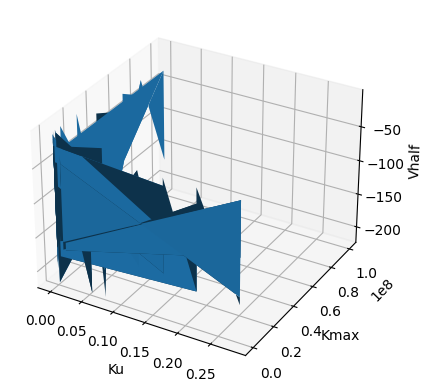

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

cmap = plt.get_cmap('jet')
cmap_norm = matplotlib.colors.Normalize(cmin, cmax)
scale_map = matplotlib.cm.ScalarMappable(norm=cmap_norm, cmap=cmap)

# ax.scatter(Vhalf_list, np.log(Kmax_list), np.log(Ku_list),
#            c=scale_map.to_rgba(RMSError_drug),
#            s=100, marker='^', zorder=-10)
# ax.scatter(Vhalf_range, np.log(Kmax_range), np.log(Ku_range),
#            c=scale_map.to_rgba(RMSError_space),
#            s=10, marker='o', zorder=-10, alpha=0.5)

half_len = int(np.ceil(len(combined_df.index) / 2))
Vhalf_2D = np.array([Vhalf_range[:half_len], Vhalf_range[half_len-1:]])
Kmax_2D = np.array([Kmax_range[:half_len], Kmax_range[half_len-1:]])
Ku_2D = np.array([Ku_range[:half_len], Ku_range[half_len-1:]])
print(len(Vhalf_range[:half_len]))
print(len(Vhalf_range[half_len:]))
# Plot contour surfaces
_ = ax.plot_surface(
    Ku_2D, Kmax_2D, Vhalf_2D)
# _ = ax.contourf(
#     X[0, :, :], data[0, :, :], Z[0, :, :],
#     zdir='y', offset=0, **kw
# )
# C = ax.contourf(
#     data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
#     zdir='x', offset=X.max(), **kw
# )
# scale_map.set_array(RMSError_drug)
# fig.colorbar(scale_map)

# handles, labels = ax.get_legend_handles_labels()
# unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if
#           l not in labels[:i]]
# ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(1.0, 1.0))
# ax.set_facecolor('silver')
ax.set_xlabel('Ku')
ax.set_ylabel('Kmax')
ax.set_zlabel('Vhalf')
ax.set_rasterization_zorder(0)

# saved_fig_dir = '../../figures/testing/'
# plt.savefig(saved_fig_dir + 'test.pdf')
plt.show()